In [262]:
from astropy.table import Table
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import stats

np.set_printoptions(threshold=sys.maxsize)

In [154]:
matplotlib.rcParams['text.usetex']=True


### Importing data and classification

In [7]:
data = Table.read('data_flags.dat', format = 'ascii')

In [8]:
# ra,dec,z
ra = np.array(data['ra'])
dec = np.array(data['dec'])
z = np.array(data['redshift'])

In [9]:
#stellar mass
Mstar = np.array(data['Mstar'])
Mstar_NSA= np.array(data['Mstar_NSA'])
# color
u_r = np.array(data['u_r'])
g_r = np.array(data['g_r'])
u_r_NSA = np.array(data['u_r_NSA'])
g_r_NSA = np.array(data['g_r_NSA'])
# absolute magniture
rabsmag = np.array(data['rabsmag'])
rabsmag_NSA = np.array(data['rabsmag_NSA'])
#star formation rate and specific SPR
SFR  = np.array(data['SFR'])
sSFR = np.array(data['sSFR'])

In [10]:
#classification V^2

wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder

wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

# len(wall_v2)+len(void_v2)+len(edge_v2)+len(out_v2),len(wall_vf)+len(void_vf)+len(edge_vf)+len(out_vf), len(data) #check

### Overlap

In [11]:
count1 =0
for i in void_v2:
    if i in edge_vf:
        count1+=1

In [12]:
count1/len(void_v2) #70% of V^2 void galaxies are classified wall in voidfinder

0.1300140532076811

In [14]:
len(void_vf),len(void_v2)

(45521, 205647)

In [15]:
count2=0
test=[]
for i in void_vf:
    if i in void_v2:
        count2+=1
    else:
        test.append(i)

In [16]:
count2/len(void_vf) # 68% of voidfinder voids galaxies are classified void in V^2, the leftover 32% are classified wall.

0.6833988708508161

In [17]:
count3=0
for i in test:
    if i in wall_v2:
        count3+=1

In [18]:
count3/len(test) # 95% of the 32% from above are classified wall by V^2

0.9503885650846516

#### Where do these 32% live? --- nowhere specific

In [20]:
#test # voidfinder void galaxies that are mostly classified as wall in V^2

In [22]:
len(test)

14412

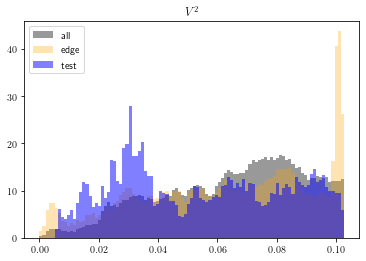

In [160]:
bins_=np.linspace(np.min(z),0.1026,100)
plt.hist(z[z< 0.1026],alpha=0.8,density=True,bins=bins_,label='all',color='gray')
plt.hist(z[edge_vf],bins=bins_,density=True,color='orange',label="edge",alpha=0.3)
plt.hist(z[test],bins=bins_,color='blue',density=True,label="test", alpha =0.5)

plt.legend()
plt.title(r"$V^{2}$")
plt.show()

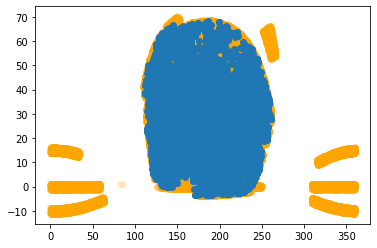

In [131]:
plt.scatter(ra[z< 0.1026], dec[z< 0.1026], color='orange', alpha=0.1)
plt.scatter(ra[test],dec[test])


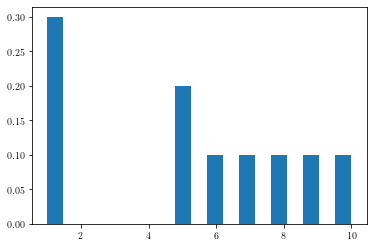

In [309]:
counts, bins = np.histogram([1,1,1,5,5,6,7,8,9,10], np.linspace(1,10, 20))
counts = np.array(counts)/ len(arr)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

### Plots

In [397]:
# ax = plt.figure(figsize=(8,4))
# all = Mstar[data['redshift']< 0.1026]
# counts_wall, bins_wall = np.histogram(Mstar[wall_vf], np.linspace(5.5,12.5, 250))
# counts_void, bins_void = np.histogram(Mstar[void_vf], np.linspace(5.5,12.5, 250))
# counts_all, bins_all = np.histogram(all, np.linspace(5.5,12.5, 250))

# counts_wall,counts_void,counts_all = np.array(counts_wall)/ len(Mstar[wall_vf]),np.array(counts_void)/ len(Mstar[void_vf]),np.array(counts_all)/ len(all)
# # plt.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall)
# # plt.hist(bins_all[:-1], bins=bins_all, weights=counts_void)
# # plt.hist(bins_all[:-1], bins=bins_all, weights=counts_all)

# ax.plt.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall, label = 'Wall' , color='black', histtype='step')
# ax.hist(bins_void[:-1], bins=bins_void, weights=counts_void ,label = 'Void', color = 'red',histtype='step')
# ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
# ax.title('Star Mass - Voidfinder')
# ax.ylabel(r"$\frac{count}{total}=$ (Fraction)",fontsize=16)
# ax.legend()
# ax.show()

In [542]:
def char(char_, bins_, title='galaxy property', label='x-label', voidfinder=False,x=None,y=None):
    '''
    Plots a histogram for a galaxy charachterstic for wall and void galaxies
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    voidfinder : (bool) True if the classification comes from the voidfinder algorithm, False if it comes from V^2
    x: x coordinate of the location of the algorithm's name 
    y: y coordinate of the location of the algorithm's name
    '''
    if voidfinder == True:
        char_wall = char_[wall_vf]
        char_void = char_[void_vf]
        x_vf=x
        y_vf=y
    else:
        char_wall = char_[wall_v2]
        char_void = char_[void_v2]
        x_v2=x
        y_v2=y
    fig, ax = plt.subplots(figsize=(10, 6))
    
    counts_wall, bins_wall = np.histogram(char_wall, bins= bins_)
    counts_void, bins_void = np.histogram(char_void, bins= bins_)
    counts_all, bins_all = np.histogram(char_[data['redshift']< 0.1026], bins= bins_)
    
    counts_wall,counts_void = np.array(counts_wall)/len(char_wall), np.array(counts_void)/len(char_void)
    counts_all = np.array(counts_all)/len(char_[data['redshift']< 0.1026])
    
    ax.hist(bins_wall[:-1], bins=bins_wall, weights=counts_wall, label = 'Wall' , color='black', histtype='step')
    ax.hist(bins_void[:-1], bins=bins_void, weights=counts_void ,label = 'Void', color = 'red',histtype='step')
    ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
    
    if (voidfinder == True) & (x!= None):
        ax.text(x_vf, y_vf, "VoidFinder", fontsize=20)
    if (voidfinder == False) & (x!= None):
        ax.text(x_v2, y_v2, r'\boldmath$V^{2}$', fontsize=20)
    
    ax.legend(fontsize=14)
#     plt.title(title, fontsize=18)
    ax.set_xlabel(label, fontsize=16)
    ax.set_ylabel(r"Fraction of galaxies",fontsize=16)
    
    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
    
    plt.savefig('figures/'+title+".png")
    plt.show()
    
    


In [546]:
def char_void(char_, bins_, title='galaxy property', label='x-label'):
    '''
    Plots a histogram for a galaxy charachterstic for void galaxies only for both algorithms
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    '''
    char_void_vf = char_[void_vf]
    char_void_v2 = char_[void_v2]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
#     plt.hist(char_void_vf, label = 'Voidfinder void galaxies' ,bins= bins_,alpha = 0.6, density = True, color='green')
#     plt.hist(char_void,  label = 'V^2 void galaxies',bins= bins_, color = 'blue',alpha = 0.4, density = True)
#     plt.hist(char_[data['redshift']< 0.1026],  label = 'All galaxies',bins= bins_, color = 'gray',alpha = 0.6, density = True)

#     plt.legend()
#     plt.title(title)
#     plt.xlabel(label)    
    
#     plt.savefig('figures/'+title+".png")
#     plt.show()
    
    
    counts_void_vf, bins_void_vf = np.histogram(char_void_vf, bins= bins_)
    counts_void_v2, bins_void_v2 = np.histogram(char_void_v2, bins= bins_)
    counts_all, bins_all = np.histogram(char_[data['redshift']< 0.1026], bins= bins_)
    
    counts_void_vf,counts_void_v2 = np.array(counts_void_vf)/len(char_void_vf), np.array(counts_void_v2)/len(char_void_v2)
    counts_all = np.array(counts_all)/len(char_[data['redshift']< 0.1026])
    
    ax.hist(bins_void_vf[:-1], bins=bins_void_vf, weights=counts_void_vf, label = 'Voidfinder void galaxies' , color='red', histtype='step')
    ax.hist(bins_void_v2[:-1], bins=bins_void_v2, weights=counts_void_v2 ,label = r'$V^{2}$ void galaxies', color = 'blue',histtype='step')
    ax.hist(bins_all[:-1], bins=bins_all, weights=counts_all,  label = 'All', color = 'gray',alpha = 0.3)
    
    
    ax.legend(fontsize=14)
#     plt.title(title, fontsize=18)
    ax.set_xlabel(label, fontsize=16)
    ax.set_ylabel(r"Fraction of galaxies",fontsize=16)
    
    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
        
    plt.savefig('figures/'+title+".png")
    plt.show()

In [540]:
def CDF(char_, bins_, title='galaxy property', label='x-label'):
    '''
    Plots the cumulative distribution for void,wall galaxies for both algorithms for a given galaxy property
    
    arguments:
    
    char_ : (numpy array) charachteristic of galaxy desired for plotting
    bins_ : (numpy linear space) histogram bins
    '''

    fig, ax = plt.subplots(figsize=(20, 6))

    ax.hist(char_[void_vf].flatten(), bins=bins_, density=True, histtype='step', label='VoidFinder Void', cumulative=True, color='red')
    ax.hist(char_[wall_vf].flatten(), bins=bins_, density=True, histtype='step', label='VoidFinder Wall',cumulative=True, color='red',linestyle='-.')
    ax.hist(char_[void_v2], bins=bins_, density=True, histtype='step', label= r'$V^{2}$ Void',cumulative=True, color='blue')
    ax.hist(char_[wall_v2], bins=bins_, density=True, histtype='step', label= r'$V^{2}$ Wall',cumulative=True,linestyle='-.', color='blue')
    ax.hist(char_[data['redshift']< 0.1026], bins=bins_, density=True, histtype='step', label='All galaxies',cumulative=True, color='gray')

    ax.grid(True)
    ax.legend(loc='upper left',fontsize=18)
#     ax.set_title(title)
    ax.set_xlabel(label,fontsize=18)
    ax.set_ylabel('Likelihood of occurrence',fontsize=18)

    if label == 'Absolute Magnitude' or label == 'Absolute Magnitude - NSA':
        ax.set_xlim(-12, -24) 
        
    plt.savefig('figures/'+title+".png")
    plt.show()

#### Star Mass

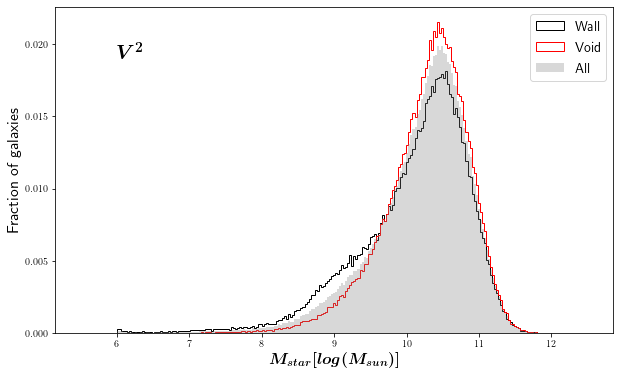

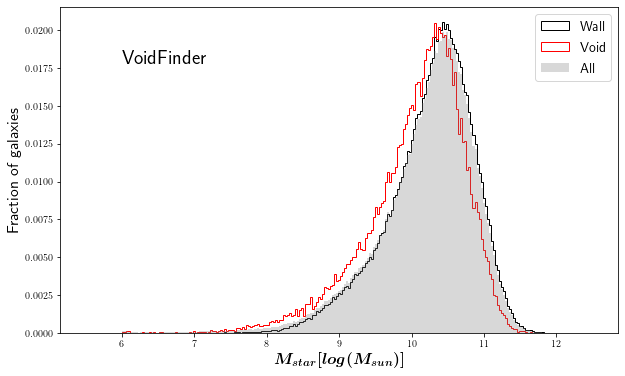

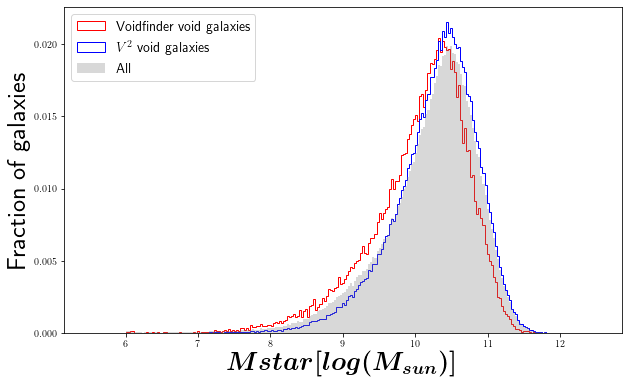

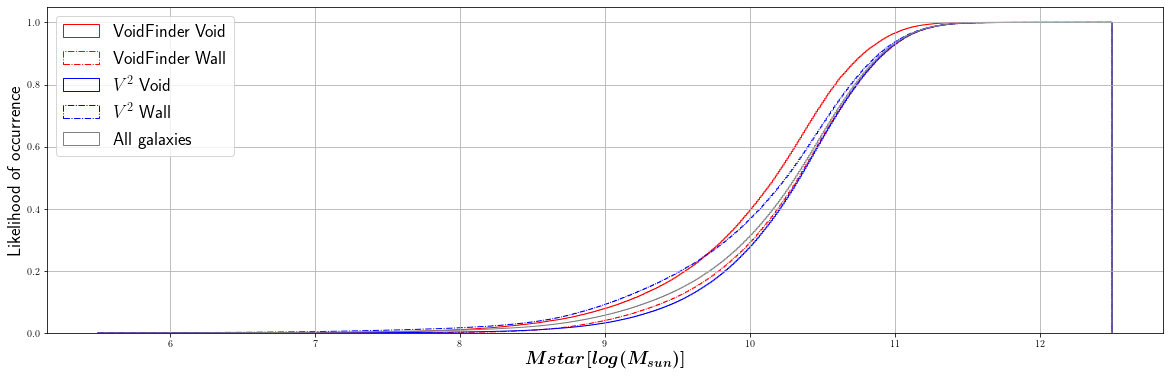

In [512]:
char(Mstar,np.linspace(5.5,12.5, 250),r'\textbf{Star Mass - }\boldmath${V^{2}}$',r'\boldmath$M_{star} [ log(M_{sun}) ]$',x=6,y=0.019)
char(Mstar,np.linspace(5.5,12.5, 250),r'\textbf{Star Mass - Voidfinder}',r'\boldmath$M_{star} [ log(M_{sun}) ]$', voidfinder = True,x=6,y=0.0178)
char_void(Mstar,np.linspace(5.5,12.5, 250),'Star Mass - void galaxies',r'\boldmath$Mstar [log(M_{sun})]$')
CDF(Mstar,np.linspace(5.5,12.5, 700),'Cumulative Star Mass',r'\boldmath$Mstar [log(M_{sun})]$')



#### Star Mass _ NSA

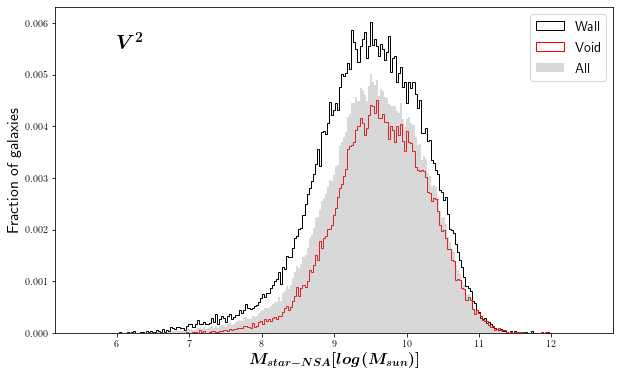

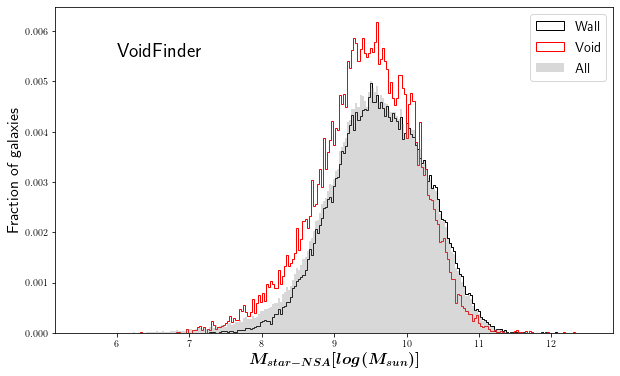

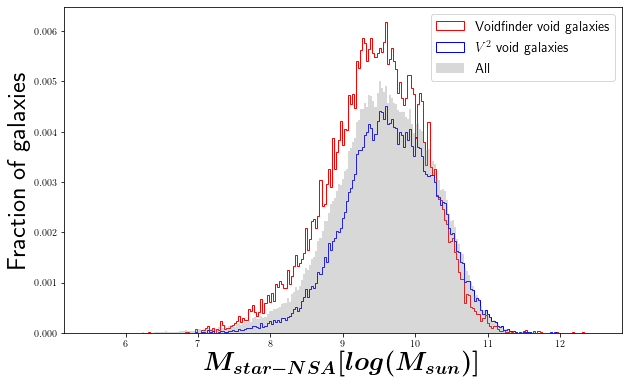

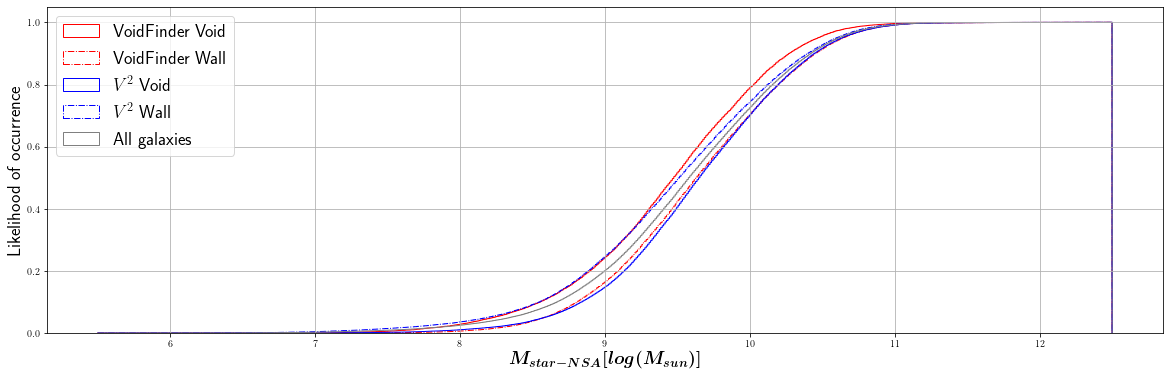

In [514]:
char(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 250),r'\textbf{Star Mass NSA - }\boldmath$V^{2}$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$',x=6,y=0.0055)
char(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 250),'$Star Mass_{NSA} - VoidFinder$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$', voidfinder = True,x=6,y=0.0055)
char_void(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 250),'$Star Mass_{NSA}- void galaxies$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$')
CDF(np.log10(Mstar_NSA),np.linspace(5.5,12.5, 700),'$Cumulative Star Mass_{NSA}$',r'\boldmath$M_{star-NSA} [log(M_{sun})]$')

#### Color u_r

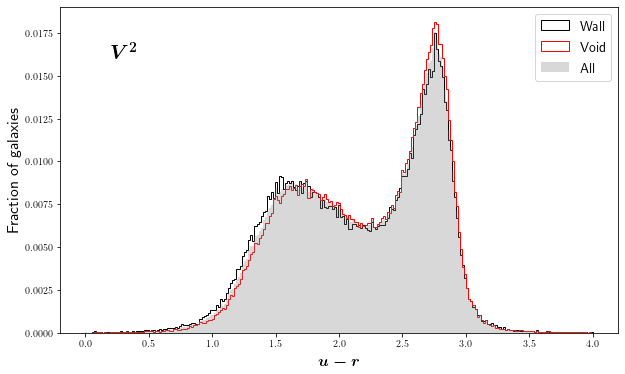

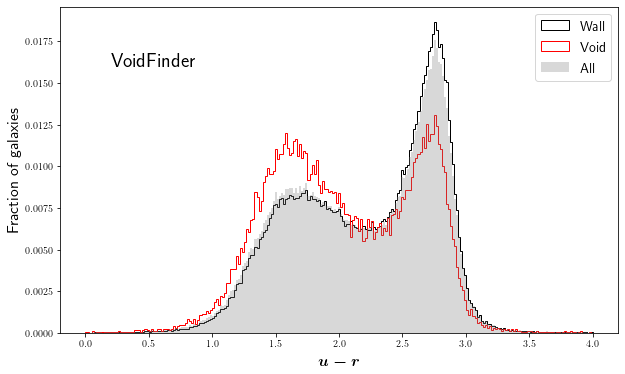

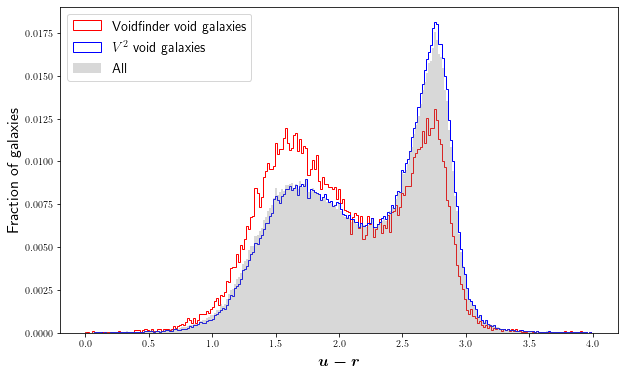

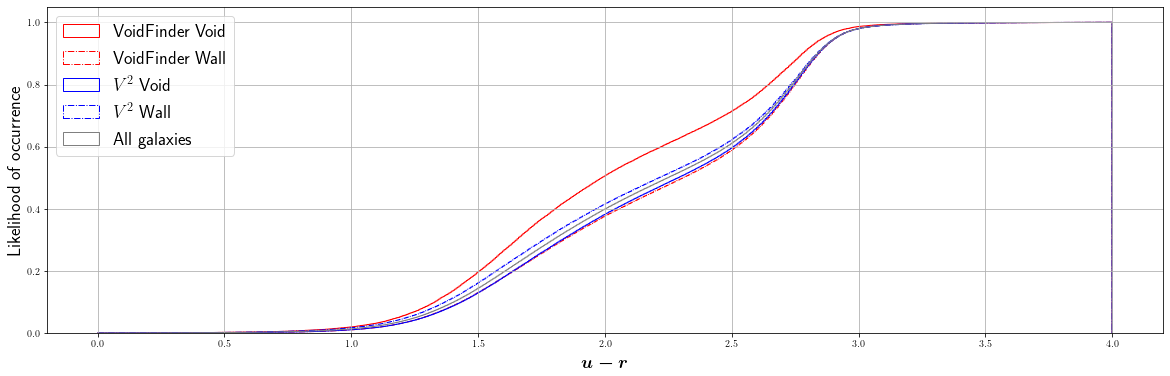

In [547]:
char(u_r,np.linspace(0,4, 250),'Color u_r - V^2',r'\boldmath$u-r$',x=0.2,y=0.016)
char(u_r,np.linspace(0,4, 250),'Color u_r - Voidfinder',r'\boldmath$u-r$', voidfinder = True,x=0.2,y=0.016)
char_void(u_r,np.linspace(0,4, 250),'Color u_r - void galaxies',r'\boldmath$u-r$')
CDF(u_r,np.linspace(0,4, 700),'Cumulative Color u_r',r'\boldmath$u-r$')




#### Color u_r _NSA

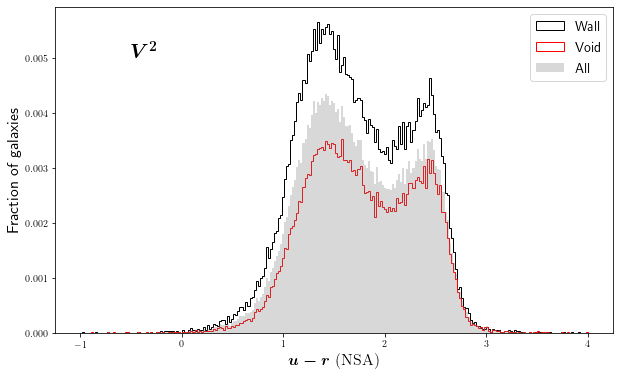

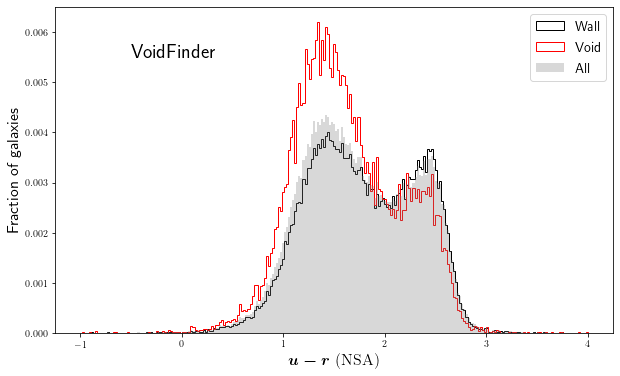

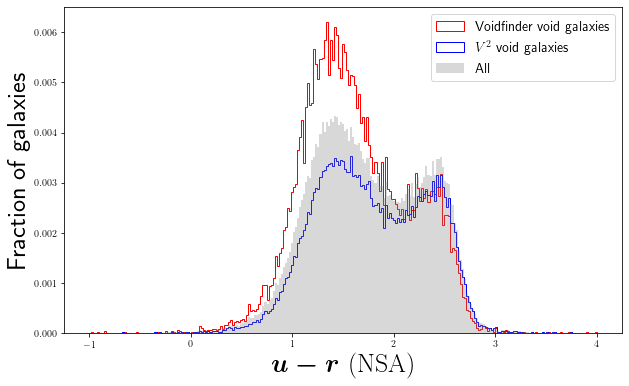

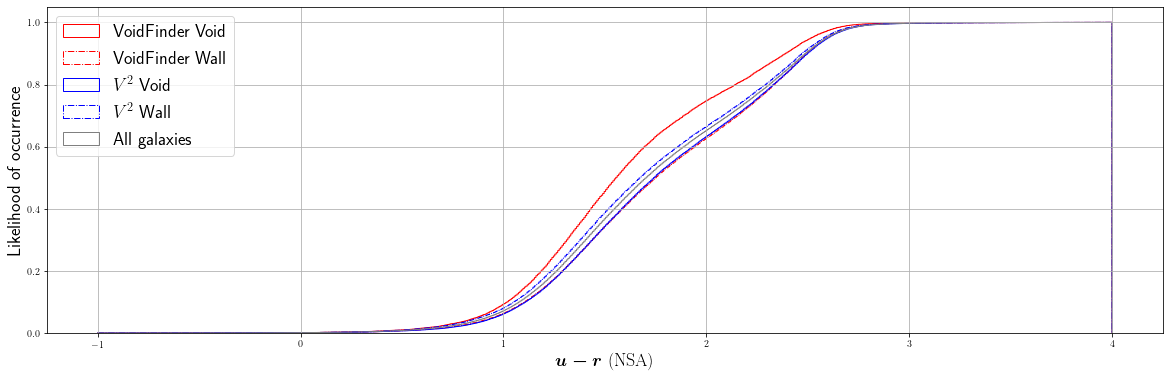

In [516]:
char(u_r_NSA,np.linspace(-1,4, 250),'Color u_r V^2',r'\boldmath$u-r$ \textrm{(NSA)}',x=-0.5,y=0.005)
char(u_r_NSA,np.linspace(-1,4, 250),'Color u_r-NSA- Voidfinder',r'\boldmath$u-r$ \textrm{(NSA)}', voidfinder = True,x=-0.5,y=0.0055)
char_void(u_r_NSA,np.linspace(-1,4, 250),'Color u_r -NSA- void galaxies',r'\boldmath$u-r$ \textrm{(NSA)}')
CDF(u_r_NSA,np.linspace(-1,4, 700),'Cumulative Color u_r-NSA',r'\boldmath$u-r$ \textrm{(NSA)}')


#### Color g_r 

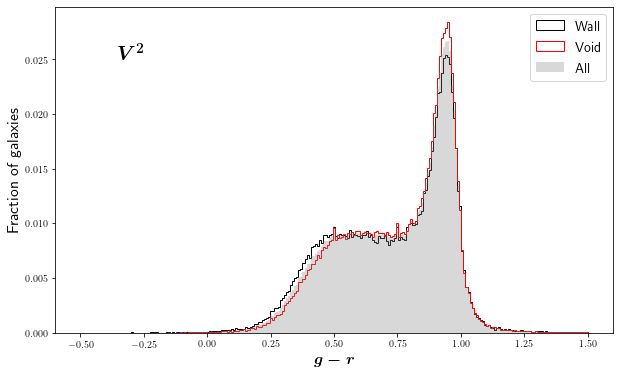

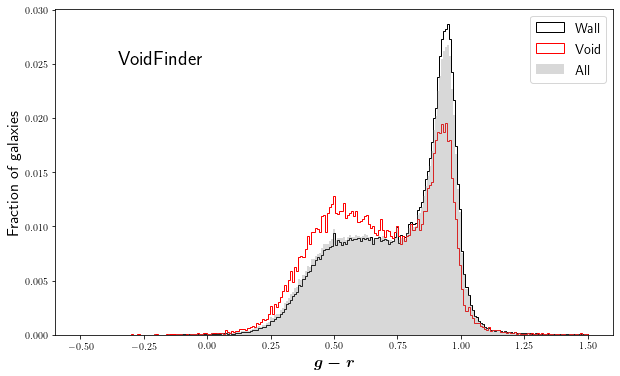

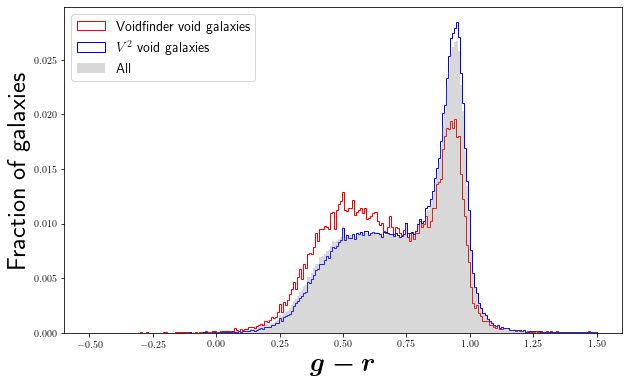

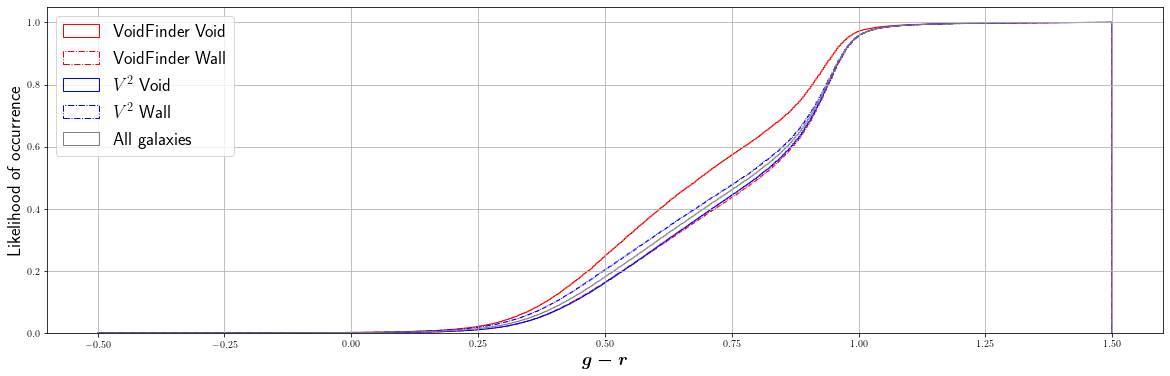

In [519]:
char(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - V^2',r'\boldmath$g-r$',x=-0.35,y=0.025)
char(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - Voidfinder',r'\boldmath$g-r$', voidfinder = True,x=-0.35,y=0.025)
char_void(g_r,np.linspace(-0.5,1.5, 250),'Color g_r - void galaxies',r'\boldmath$g-r$')
CDF(g_r,np.linspace(-0.5,1.5, 700),'Cumulative Color g_r',r'\boldmath$g-r$')

#### Color g_r _NSA

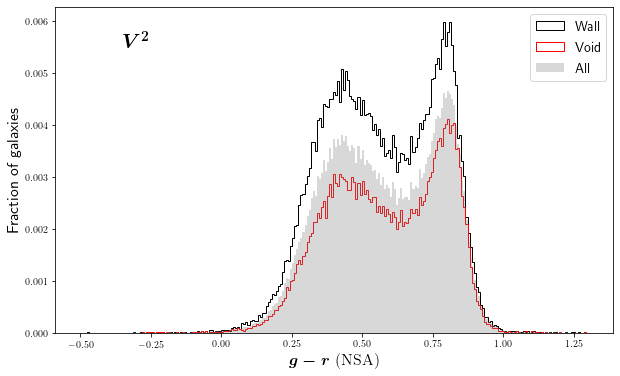

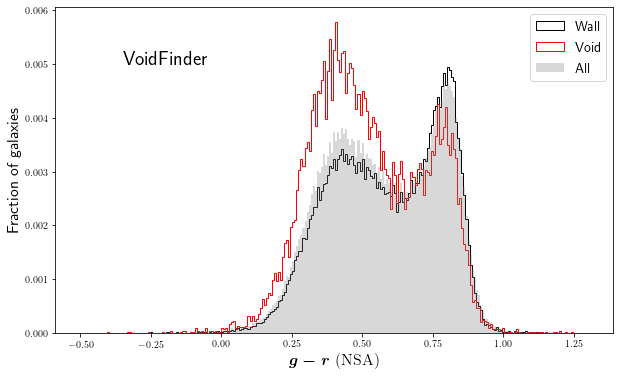

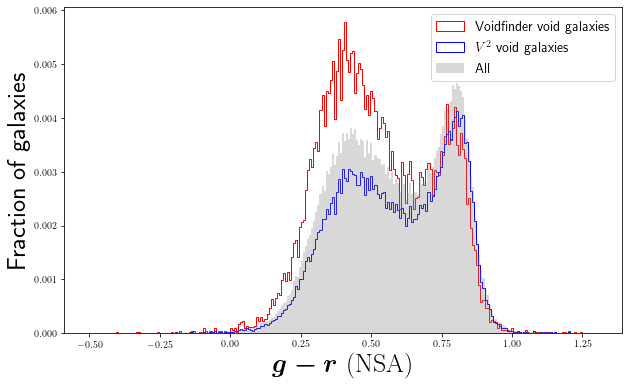

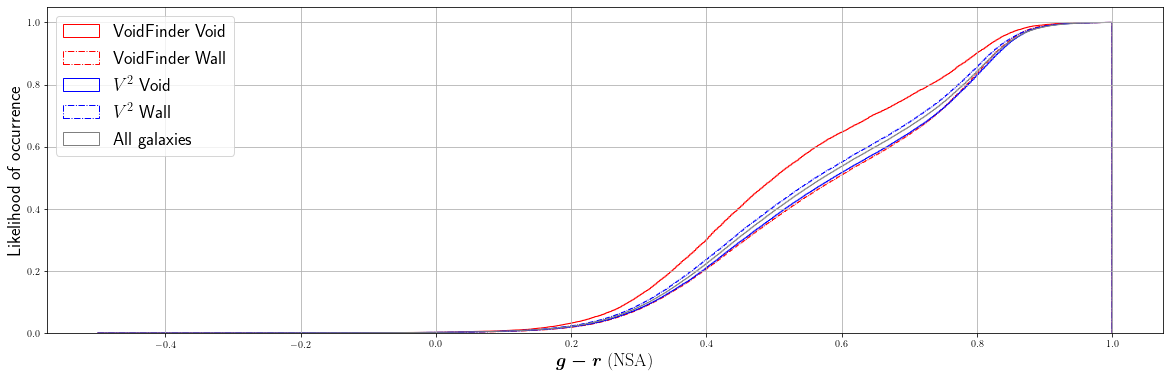

In [523]:
char(g_r_NSA,np.linspace(-0.5,1.3, 250),'Color g_r-NSA - V^2',r'\boldmath$g-r$ \textrm{(NSA)}',x=-0.35,y=0.0055)
char(g_r_NSA,np.linspace(-0.5,1.3, 250),'Color g_r-NSA - Voidfinder',r'\boldmath$g-r$ \textrm{(NSA)}', voidfinder = True,x=-0.35,y=0.005)
char_void(g_r_NSA,np.linspace(-0.5,1.3, 250),'Color g_r -NSA- void galaxies',r'\boldmath$g-r$ \textrm{(NSA)}')
CDF(g_r_NSA,np.linspace(-0.5,1, 700),'Cumulative Color g_r-NSA',r'\boldmath$g-r$ \textrm{(NSA)}')

#### Absolute magnitude

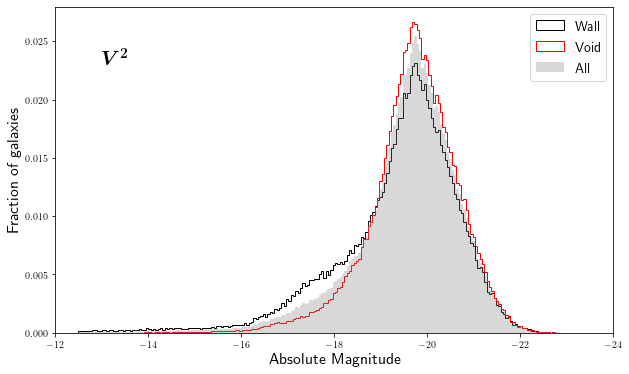

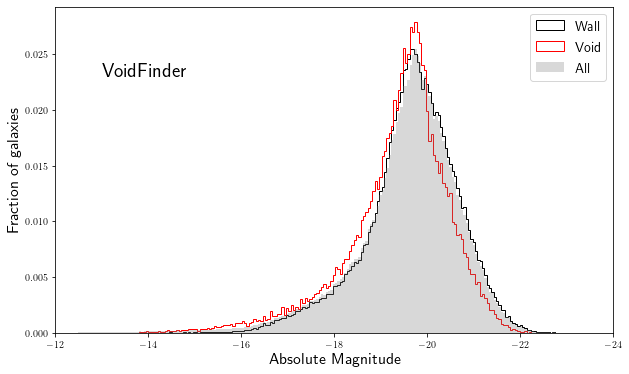

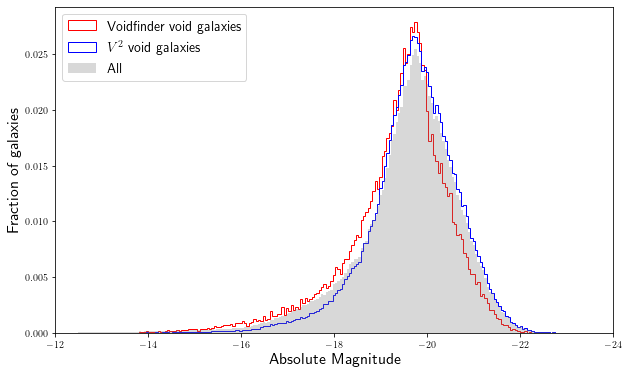

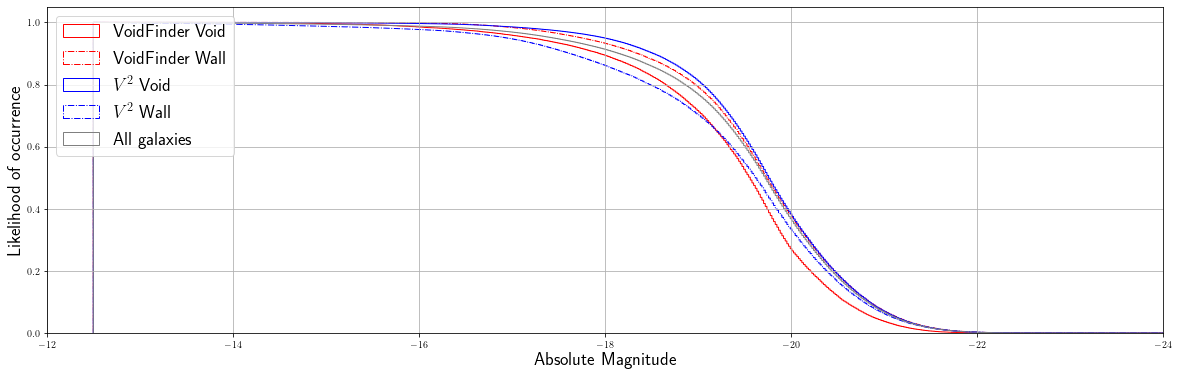

In [536]:
char(rabsmag,np.linspace(-25,-12.5, 250),'Absolute Magnitude - V^2','Absolute Magnitude',x=-13,y=0.023)
char(rabsmag,np.linspace(-25,-12.5, 250),'Absolute Magnitude - Voidfinder','Absolute Magnitude', voidfinder = True,x=-13,y=0.023)
char_void(rabsmag,np.linspace(-25,-12.5, 250),'Absolute Magnitude- void galaxies','Absolute Magnitude')
CDF(rabsmag,np.linspace(-25,-12.5, 700),'Cumulative Absolute Magnitude','Absolute Magnitude')

#### Absolute magnitude _NSA

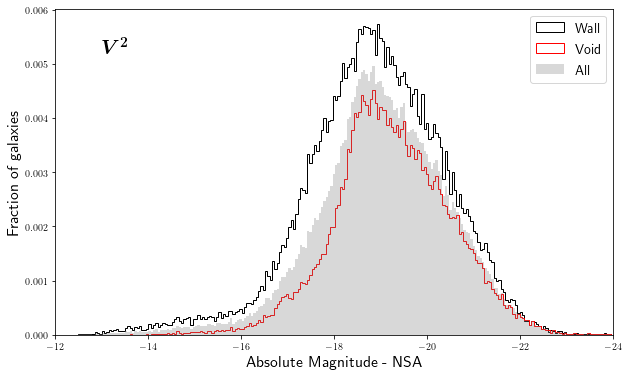

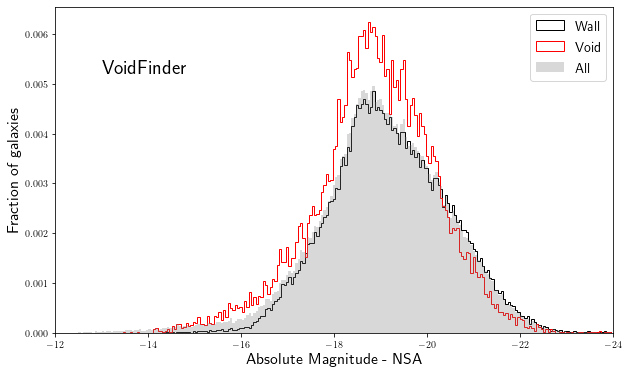

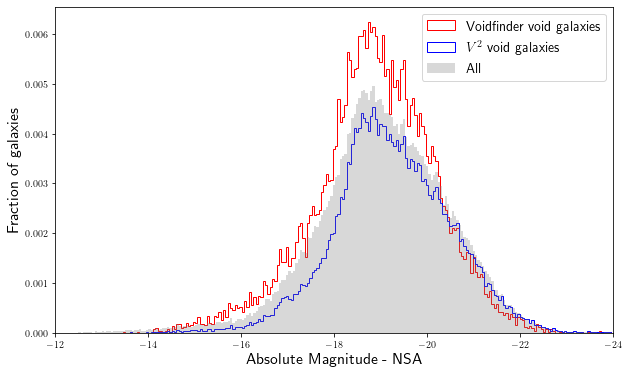

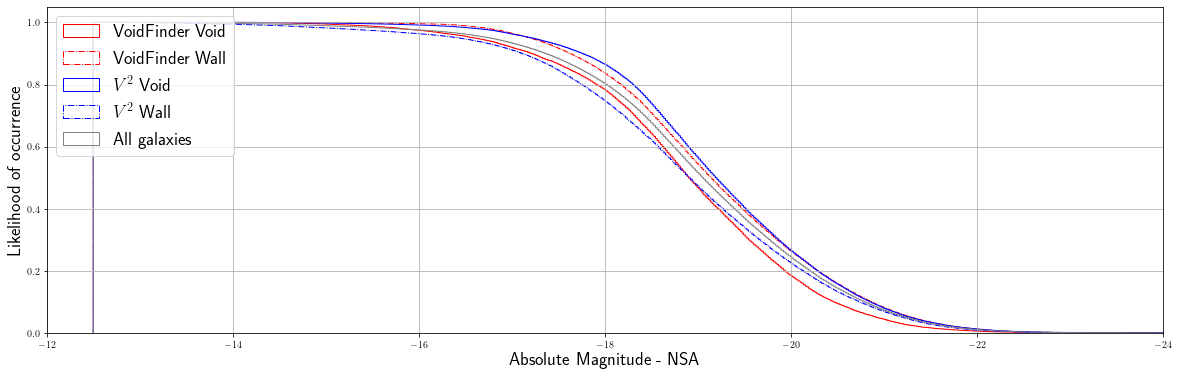

In [545]:
char(rabsmag_NSA,np.linspace(-25,-12.5, 250),'Absolute Magnitude_NSA - V^2','Absolute Magnitude - NSA',x=-13,y=0.0052)
char(rabsmag_NSA,np.linspace(-25,-12.5, 250),'Absolute Magnitude_NSA - Voidfinder','Absolute Magnitude - NSA', voidfinder = True,x=-13,y=0.0052)
char_void(rabsmag_NSA,np.linspace(-25,-12.5, 250),'Absolute Magnitude_NSA- void galaxies','Absolute Magnitude - NSA')
CDF(rabsmag_NSA,np.linspace(-25,-12.5, 700),'Cumulative Absolute Magnitude_NSA','Absolute Magnitude - NSA')

#### Star Formation Rate

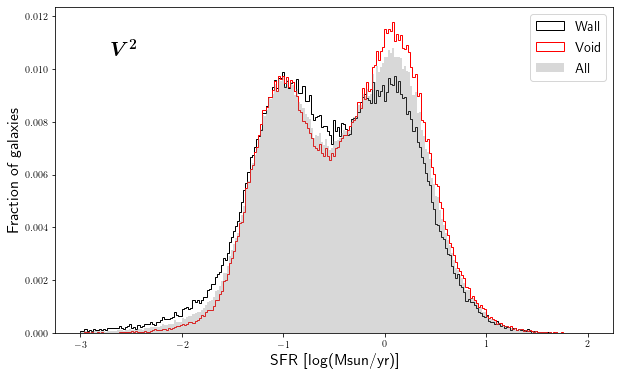

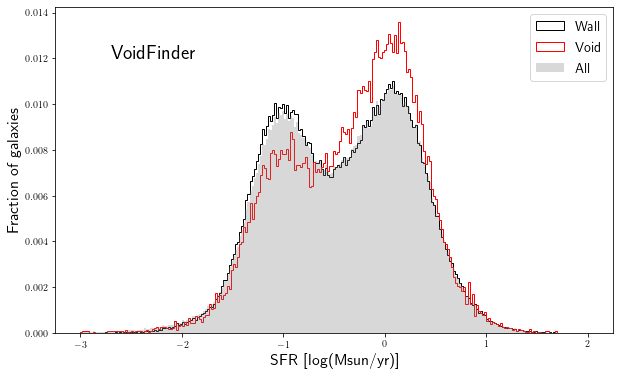

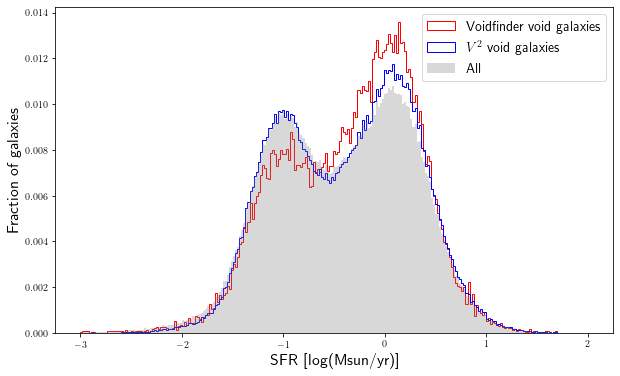

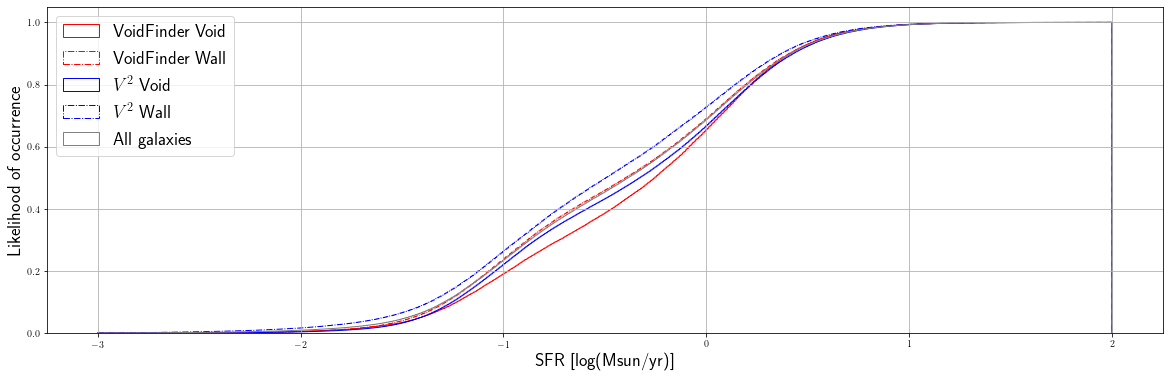

In [553]:
char(SFR,np.linspace(-3,2, 250),'star formation rate - V^2','SFR [log(Msun/yr)]',x=-2.7,y=0.0105)
char(SFR,np.linspace(-3,2, 250),'star formation rate - Voidfinder','SFR [log(Msun/yr)]', voidfinder = True,x=-2.7,y=0.012)
char_void(SFR,np.linspace(-3,2, 250),'star formation rate- void galaxies','SFR [log(Msun/yr)]')
CDF(SFR,np.linspace(-3,2, 700),'Cumulative star formation rate','SFR [log(Msun/yr)]')

#### Specific star Formation Rate

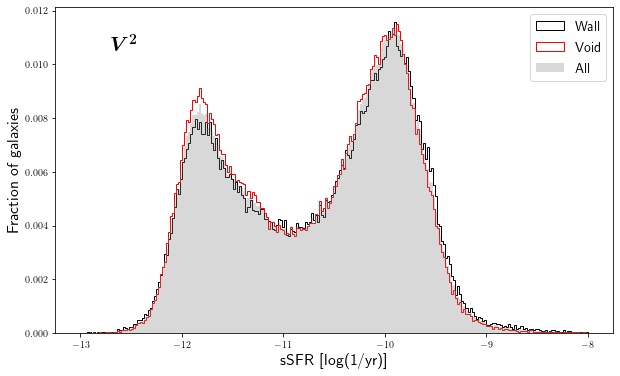

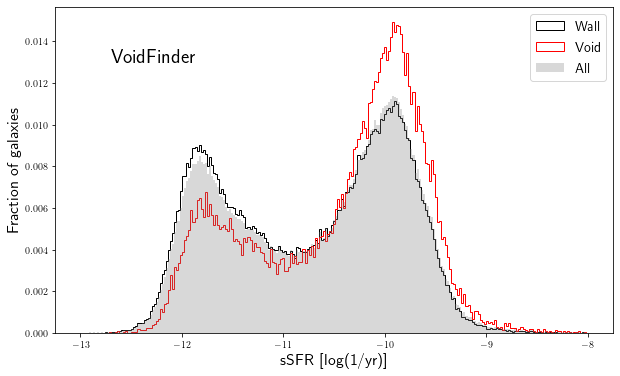

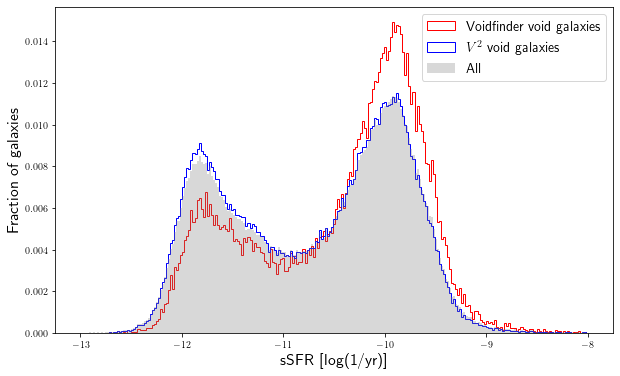

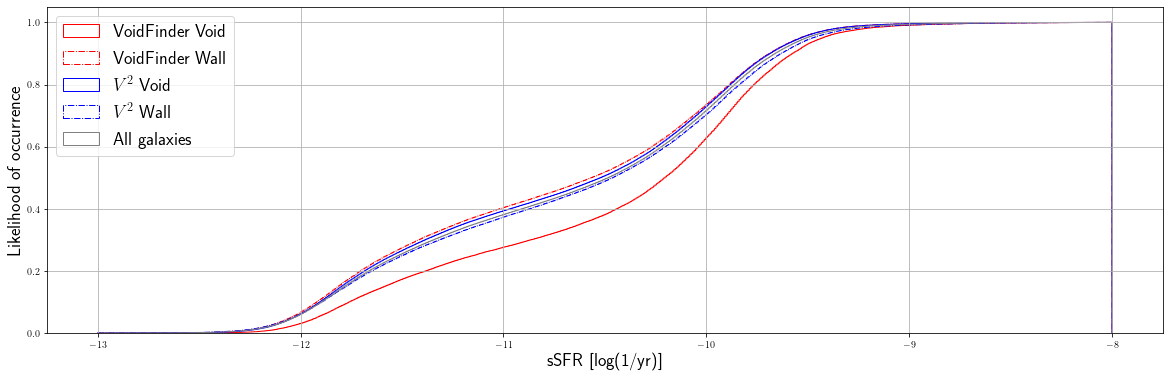

In [556]:
char(sSFR,np.linspace(-13,-8, 250),'specific star formation rate - V^2','sSFR [log(1/yr)] ',x=-12.7,y=0.0105)
char(sSFR,np.linspace(-13,-8, 250),'specific star formation rate - Voidfinder','sSFR [log(1/yr)]', voidfinder = True,x=-12.7,y=0.013)
char_void(sSFR,np.linspace(-13,-8, 250),'specific star formation rate- void galaxies','sSFR [log(1/yr)] ')
CDF(sSFR,np.linspace(-13,-8, 700),'Cumulative specific star formation rate','sSFR [log(1/yr)] ')

### KS tests

In [55]:
def KS(char_, void_void=False,void_wall=False,wall_wall=False,voidfinder=False,v2=False):
    '''
    char_: array of galaxy property
    void_void: True if we want to calculate the KS test between two void galaxy samples
    void_wall: True if we want to calculate the KS test between void and wall galaxy samples
    voidfinder : True only if void_wall is True and classification from voidfinder is used
    '''
    #void_wall
    if (void_wall and voidfinder):
        return stats.ks_2samp(char_[wall_vf], char_[void_vf]) 
    if (void_wall and v2):
        return stats.ks_2samp(char_[wall_v2], char_[void_v2]) 
    
    #void_void
    if void_void:
        return stats.ks_2samp(char_[void_vf], char_[void_v2]) 

    # wall_wall
    if wall_wall:
        return stats.ks_2samp(char_[wall_vf], char_[wall_v2]) 



In [120]:
def KS_table(char_):
    '''
    output: two numbers for each cell: kS Test statistic and p-value
    
    diagonals are void_void and wall_wall, row2col1 is void_wall for voidfinder,  and row1col2 is void_wall for V^2
    '''
    a_1_1 = tuple(KS(char_,void_void=True)) #1_1
    a_2_1 = tuple(KS(char_,void_wall=True,voidfinder=True))

    a_1_2 = tuple(KS(char_,void_wall=True,v2=True))
    a_2_2 = tuple(KS(char_,wall_wall=True)) 

    col1=[a_1_1,a_2_1]
    
    col2=[a_1_2,a_2_2]
    

    
    return Table([col1,col2], names=('voidfinder','v_squared'))


In [562]:
KS_table(Mstar)

voidfinder [2],v_squared [2]
float64,float64
0.12779267654782234 .. 0.0,0.08318112786478526 .. 0.0
0.125366533185717 .. 0.0,0.06905365180479675 .. 0.0


In [124]:
#void-void      void-wall-v2
#void-wall-vf   wall-wall

In [ ]:
# decide how to interpret KS test, compare to critical value, p-value? ...

In [594]:
def critical_value(n,m,alpha=0.000000000000000000000000000000000000000001):
    '''
    calculates critical value: if the test statistic is larger than this then the null hypothesis can be rejected 
    at level alpha.
    n: size of sample 1
    m: size of sample 2
    '''
    
    return np.sqrt(-np.log(alpha/2)*(1/2))*np.sqrt((n+m)/(n*m))

In [595]:
critical_value(len(Mstar[wall_vf]),len(Mstar[void_vf])), critical_value(len(Mstar[wall_v2]),len(Mstar[void_v2]))

(0.035894099904138624, 0.02486973838113133)

In [583]:
critical_value(len(Mstar[data['redshift']< 0.1026]),len(Mstar[void_vf])), critical_value(len(Mstar[data['redshift']< 0.1026]),len(Mstar[void_v2]))

(0.006748918330462532, 0.003741446596947954)

In [ ]:
#next: understand hypothesis testing, what does it mean for the hypothesis to be rejected the X% level?
# write statistics paragraph for stellar mass

### Calculate averages and medians

In [611]:
def remove_nan(array):
    return array[np.logical_not(np.isnan(array))]

In [679]:
def stats(char_,voidfinder =False):
    '''
    char : array with galaxy properties e.g : Mstar
    voidfinder : true if we want to calculate the statistics of voidfinder data and not V^2 data
    
    note 1 : shifts are taken as void-wall
    note 2: percent difference are calculated with respect to the wall distribution
    
    returns: average, std of average, average shift, std of average shift, percent diff of avg , median, median shift, 
    percent diff of median
    '''
    if voidfinder==True:
        char_void= remove_nan(char_[void_vf])
        char_wall=remove_nan(char_[wall_vf])
        
    else:
        char_void= remove_nan(char_[void_v2])
        char_wall=remove_nan(char_[wall_v2])
        
    avg_void = np.mean(char_void)
    avg_wall = np.mean(char_wall)
        
    avg_shift=  avg_wall-avg_void
        
    std_avg_void = np.std(char_void,ddof=1)/np.sqrt(len(char_void))
    std_avg_wall = np.std(char_wall,ddof=1)/np.sqrt(len(char_wall))
    
    std_avg_shift = np.sqrt(std_avg_void**2 + std_avg_wall**2)
        
    percent_diff_avg = (avg_shift/avg_wall)*100
    
    median_wall = np.median(char_wall)
    median_void = np.median(char_void)
    
    median_shift = median_wall-median_void
    
    percent_diff_median = (median_shift/median_wall)*100
    
    print('average void : %f +- %f' %(avg_void, std_avg_void))
    print('average wall :  %f +- %f'%(avg_wall, std_avg_wall))
    print('average shift w.r.t wall :  %f +- %f'%(avg_shift, std_avg_shift))
    print('percent difference in avg w.r.t wall : ', percent_diff_avg)
    print('median void : ', median_void)
    print('median wall : ', median_wall)
    print('median shift w.r.t wall: ', median_shift)
    print('percent difference in median w.r.t wall : ', percent_diff_median)


In [687]:
stats(Mstar,voidfinder=True)

average void : 10.051918 +- 0.003277
average wall :  10.248286 +- 0.001338
average shift w.r.t wall :  0.196368 +- 0.003539
percent difference in avg w.r.t wall :  1.9161041816886177
median void :  10.17853832244873
median wall :  10.340807437896729
median shift w.r.t wall:  0.16226911544799805
percent difference in median w.r.t wall :  1.569211267326363


In [688]:
stats(Mstar)

average void : 10.267481 +- 0.001351
average wall :  10.092993 +- 0.002271
average shift w.r.t wall :  -0.174488 +- 0.002642
percent difference in avg w.r.t wall :  -1.7288007625992967
median void :  10.351014137268066
median wall :  10.256444454193115
median shift w.r.t wall:  -0.09456968307495117
percent difference in median w.r.t wall :  -0.9220513355999164
